In [1]:
import lightgbm as lgb
import sklearn
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from mlxtend.regressor import StackingCVRegressor
from datetime import datetime
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
df = pd.read_csv("data.csv")
display(df[:5])

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
## Check the unique number in each column
for i in df:
    print(i + " unique number is" , len(df[i].unique()))

Sex unique number is 3
Length unique number is 134
Diameter unique number is 111
Height unique number is 51
Whole weight unique number is 2429
Shucked weight unique number is 1515
Viscera weight unique number is 880
Shell weight unique number is 926
Rings unique number is 28


In [4]:
## I found the dataset has another description told the ring feature add 1.5 gives the age in years
df["Age"] = df['Rings'] + 1.5
display(df.describe())

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684,11.433684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000,30.500000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001E7F5128>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000002FF44048>]], dtype=object)

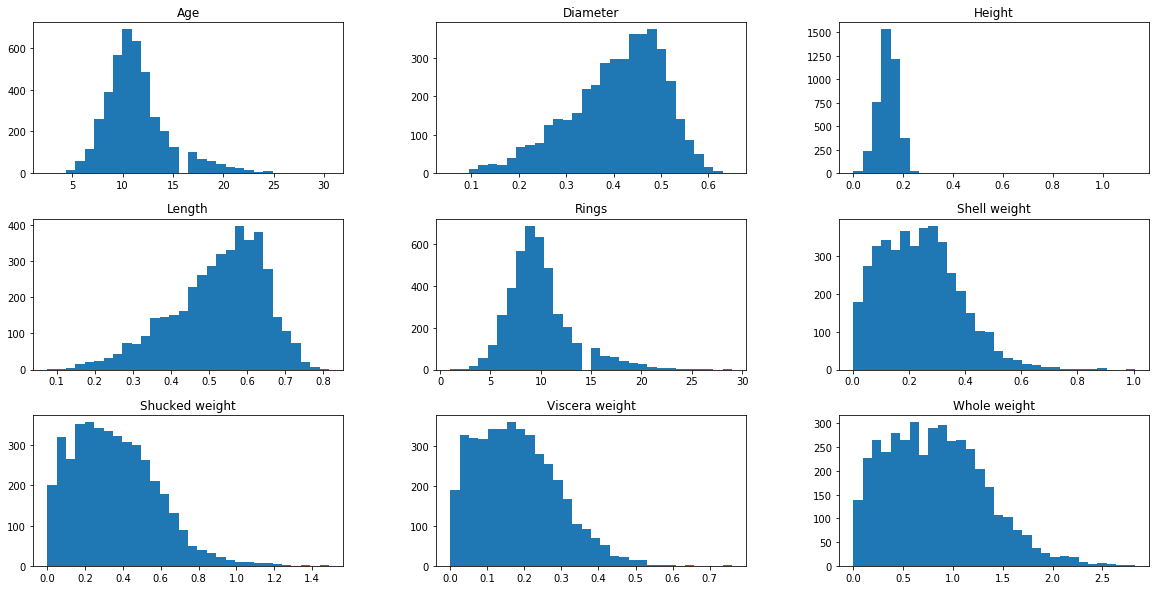

In [5]:
plt.figure(figsize=(20,20))
df.hist(figsize=(20,10), grid=False, bins = 30)

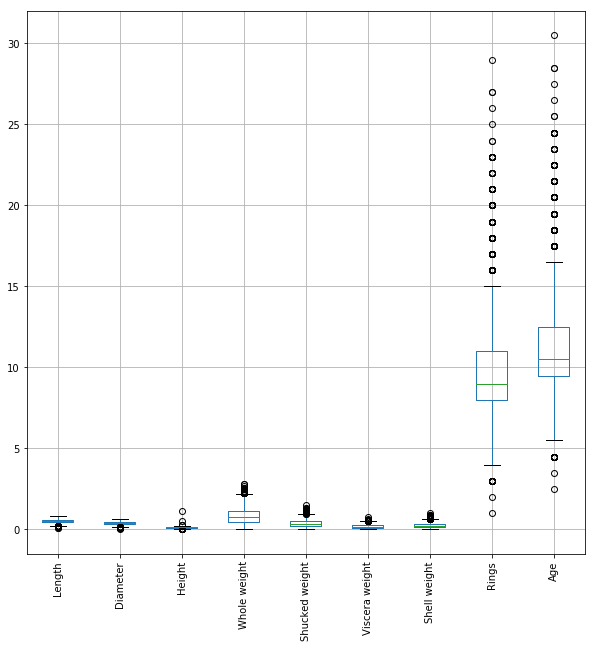

In [6]:
plt.figure(figsize=(10,10))
# for i in df.columns:
#     print(i)
#     plt.subplot(3, 3, count)
#     sns.boxplot(df[i])
#     count += 1
df.boxplot(rot = 90, figsize=(20,20))

In [7]:
df.skew().sort_values()

Length           -0.639873
Diameter         -0.609198
Whole weight      0.530959
Viscera weight    0.591852
Shell weight      0.620927
Shucked weight    0.719098
Rings             1.114102
Age               1.114102
Height            3.128817
dtype: float64

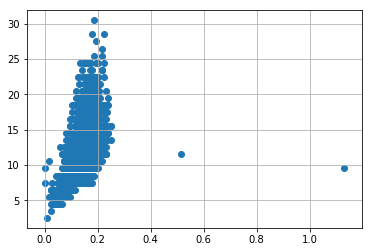

In [8]:
plt.scatter(x = df["Height"], y = df["Age"])
plt.grid(True)

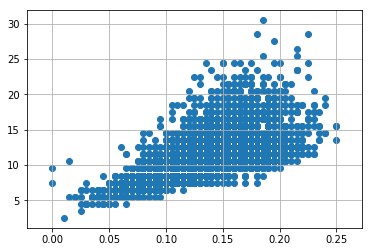

In [11]:
## Delete outlier in height-age
df = df[ df[ "Height"]<0.4]
plt.scatter(x = df["Height"], y = df["Age"])
plt.grid(True)
